# Tutorial - Tavily AI Research Agent

### Install Required Libraries

In [6]:
pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


### Load Environment Variables

In [11]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

### Tavily Search 

In [13]:
from tavily import TavilyClient
import os

client = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))

response = client.search(query='What is the Bitcoin price today?')
response

{'query': 'What is the Bitcoin price today?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Bitcoin Price | BTC to USD Price Index and Live Chart - CoinDesk',
   'url': 'https://www.coindesk.com/price/bitcoin',
   'content': 'The price of Bitcoin (BTC) is $60,725.98 today, as of Oct 02 09:24 p.m., with a 24-hour trading volume of $42.75B. Over the last 24 hours, the price has decreased by 0.00%. Bitcoin currently has a ...',
   'score': 0.99448806,
   'raw_content': None},
  {'title': 'Bitcoin Price: BTC Live Price Chart, Market Cap & News Today - CoinGecko',
   'url': 'https://www.coingecko.com/en/coins/bitcoin',
   'content': 'The price of Bitcoin (BTC) is BTC1.0000 today with a 24-hour trading volume of $12,684,017,144.50. This represents a 0.30% price increase in the last 24 hours and a 4.90% price increase in the past 7 days. With a circulating supply of 20 Million BTC, Bitcoin is valued at a market cap of BTC19,760,625.0000. Track the lates

In [15]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: Bitcoin Price | BTC to USD Price Index and Live Chart - CoinDesk, URL: https://www.coindesk.com/price/bitcoin
Title: Bitcoin Price: BTC Live Price Chart, Market Cap & News Today - CoinGecko, URL: https://www.coingecko.com/en/coins/bitcoin
Title: Bitcoin price today, BTC to USD live price, marketcap and chart ..., URL: https://coinmarketcap.com/currencies/bitcoin/
Title: Bitcoin Price | BTC price charts, live trends & history - Kraken, URL: https://www.kraken.com/prices/bitcoin
Title: Bitcoin (BTC) Price, Real-time Quote & News - Google Finance, URL: https://www.google.com/finance/quote/BTC-usd


In [17]:
response = client.search(
    query='What are the best programming languages to learn this year?',
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)

In [21]:
response

{'query': 'What are the best programming languages to learn this year?',
 'follow_up_questions': None,
 'answer': 'Based on current data sources, the best programming languages to learn in 2024 are Python, Swift, and other languages like those highlighted in the top 10 programming languages list. Python is considered the most in-demand language and is versatile for various applications including web development, automation, and artificial intelligence. Swift is also recommended for Apple product development and is noted as one of the fastest-growing languages. The top 10 programming languages list for 2024 provides a comprehensive overview of languages that are poised to shape the digital future.',
 'images': ['https://itechhacks.com/wp-content/uploads/2022/05/Programming-Language.png',
  'https://codinginfinite.com/wp-content/uploads/2019/10/Screenshot-2019-10-22-at-10.21.23-PM.png',
  'https://i.pinimg.com/originals/10/73/3a/10733aa843404536ea74f5ad3923d742.png',
  'https://cloud.ful

In [23]:
answer = client.qna_search(query='Who won the UEFA Champions League in 2024?')
print(answer)

Real Madrid won the UEFA Champions League in 2024 by defeating Borussia Dortmund 2-0 in the final. This victory secured Real Madrid's 15th European title.


### Combine Tavily's search capabilities with language models using LangChain and OpenAI

In [26]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = 'What is Flow Engineering used in agentic applications and LangGraph?'

response = client.search(query, max_results=5, search_depth='Advanced')['results']
response

[{'title': 'Exploring AI Automation: Agentic Workflows with LangGraph and ... - Medium',
  'url': 'https://medium.com/@LakshmiNarayana_U/exploring-ai-automation-agentic-workflows-with-langgraph-and-tavily-155f5442a999',
  'content': "Prominent Features\nLangGraph Concepts Overview\nNodes\nEdges\nState Management\nPersistence\nThreads\nConfiguration\nAgentic workflows with LangGraph\nMulti Agent Flow\nSupervisor Agent Flow\nFlow Engineering\nPlan and Execute\nFor a deep dive into LangGraph, do check out this excellent course at deeplearning.ai, from the founders of LangChain and Tavily.\n Sign up\nSign in\nSign up\nSign in\nExploring AI Automation: Agentic Workflows with LangGraph and Tavily\nLakshmi narayana .U\nFollow\n--\nListen\nShare\nAI Agents and Agentic Overflows\nAgents, in the context of AI and machine learning, are programs that can learn, perceive their environment, and make decisions to achieve certain goals. Author- 'Directing Business' | AI,ML Enthusiast\nHelp\nStatus\nAb

In [28]:
# setting up the OpenAI API Prompt
prompt = [
    {
        'role':'system',
        'content': f'''
        You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text.
        '''
    },
    {
        'role':'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report.
        Finish the report with a section for references including URLs
        '''
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='\n        You are an AI critical thinker research assistant.\n        Your sole purpose is to write well written, objective and structured reports on given text.\n        ', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: """[{\'title\': \'Exploring AI Automation: Agentic Workflows with LangGraph and ... - Medium\', \'url\': \'https://medium.com/@LakshmiNarayana_U/exploring-ai-automation-agentic-workflows-with-langgraph-and-tavily-155f5442a999\', \'content\': "Prominent Features\\nLangGraph Concepts Overview\\nNodes\\nEdges\\nState Management\\nPersistence\\nThreads\\nConfiguration\\nAgentic workflows with LangGraph\\nMulti Agent Flow\\nSupervisor Agent Flow\\nFlow Engineering\\nPlan and Execute\\nFor a deep dive into LangGraph, do check out this excellent course at deeplearning.ai, from the founders of LangChain and Tavily.\\n Sign up\\nSign in\\nSign up\\nSign in\\nExploring AI Automation: Agentic Workflows with LangGraph and T

In [30]:
response = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)
print(response.content)

# Report on Flow Engineering in Agentic Applications and LangGraph

## Introduction
Flow engineering is a critical component in the development of agentic applications, particularly in the context of AI and machine learning. It refers to the design and implementation of workflows that enable agents to interact, make decisions, and achieve specific goals in a systematic manner. With the rise of frameworks like LangGraph, flow engineering has become more sophisticated, allowing for the creation of resilient and dynamic workflows capable of handling complex tasks.

## Understanding Flow Engineering
Flow engineering involves the creation of workflows that dictate how data and control flow between various components in an application. This is particularly significant in multi-agent systems where different agents must collaborate to accomplish tasks. Key aspects of flow engineering include:

1. **State Management**: This involves maintaining the current state of an agent or a system througho

### LangGraph AI Research Agent Using Tavily Search

In [34]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [36]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0.7)
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

graph = graph_builder.compile(checkpointer=memory)

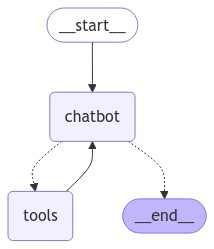

In [38]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [46]:
config = {"configurable": {"thread_id": "1"}}

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("AI: Goodbye!")
        break

    events = graph.stream(
        {"messages": [("user", user_input)]}, config, stream_mode="values"
    )
    
    for event in events:
        ai_response = event["messages"][-1].content
        print(f"AI: {ai_response}")

print("Conversation ended.")

You:  What were the major news in technology this week?


AI: What were the major news in technology this week?
AI: 
AI: [{"url": "https://www.infoplease.com/current-events/2023/november-science-technology-news", "content": "Here are the Science & Technology news events you need to know so far for November 2023. Canadian Government Bans WeChat From All Official Devices. The Euclid Telescope Sends Back Its First Set Of Images From The Deep Dark Universe. Video Chat Website, Omegle, Announces Permanent Shutdown. YouTube Is Working On AI Technology That Can Clone ..."}, {"url": "https://scitechdaily.com/news/technology/", "content": "An intense international effort to improve the resolution of magnetic resonance imaging…\nTechnology\nHuGE AI Breakthrough: Using Crowdsourced Feedback in Robot Training\nTechnology\nNew Discovery Could Make Organic Solar Cells Significantly More Efficient\nTechnology\nUnlocking Nature’s Fastest Timescales: Ultrafast Lasers Shrunk to Fingertip Size\nTechnology\nSilk Meets Silicon: The Dawn of Biological Hybrid Trans

You:  Can you please summarize it?


AI: Can you please summarize it?
AI: Here’s a summary of the major technology news from the week of November 6 to November 12, 2023:

1. **WeChat Ban**: The Canadian government has banned WeChat from all official devices due to privacy and security concerns.

2. **Euclid Telescope**: The Euclid Telescope has successfully sent back its first images from deep space, marking a significant achievement in astronomy.

3. **Omegle Shutdown**: The video chat site Omegle announced its permanent shutdown, reflecting changes in online communication trends.

4. **YouTube AI Technology**: YouTube is developing AI technology to clone voices, which could enhance content creation on the platform.

5. **AI in Renewable Energy**: Researchers are advancing AI applications to improve the efficiency of organic solar cells, potentially benefiting renewable energy efforts.

6. **Miniaturized Lasers**: Innovations in ultrafast laser technology have led to the development of tiny lasers, which could have diver

You:  exit


AI: Goodbye!
Conversation ended.
